Download the dataset and load it in your personal drive (https://docs.google.com/spreadsheets/d/1cvmeIwsYtIjO7plae-VNXrpQoQEPywKd/edit?usp=sharing&ouid=100816496332535760387&rtpof=true&sd=true
)

Press CTRL + ENTER to run a cell.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from statsmodels.tsa.arima.model import ARIMA

### Loading the data

In [4]:
df = pd.read_excel('/content/drive/MyDrive/online_retail.xlsx' )
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### Getting an overview of data

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [7]:
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


### Checking for missing values

In [8]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Replacing missing values with mean

In [9]:
df.fillna(df.mean(), inplace=True)

<ipython-input-9-bf934754a5b1>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-9-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


### Checking duplicates

In [10]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 5268


### Removing Duplicates

In [11]:
df.drop_duplicates(inplace=True)

### Data Cleaning (Separating Year & Month)

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

## **Data Analysis**

### Customer analysis

In [12]:
customer_counts = df['CustomerID'].value_counts().sort_values(ascending=False)
print('Number of unique customers:', len(customer_counts))
print()
print('Top 5 customers:')
print(customer_counts.head())

Number of unique customers: 4373

Top 5 customers:
15287.69057    135037
17841.00000      7812
14911.00000      5898
14096.00000      5128
12748.00000      4459
Name: CustomerID, dtype: int64


## Product analysis

In [13]:
product_counts = df['StockCode'].value_counts().sort_values(ascending=False)
print('Number of unique Stocks/Products:', len(product_counts))
print()
print('Top 5 Stocks/Products:')
print(product_counts.head())

Number of unique Stocks/Products: 4070

Top 5 Stocks/Products:
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
Name: StockCode, dtype: int64


## Sales analysis (Per Month)

In [14]:
sales_per_month = df.groupby('Month')['Quantity'].sum()
print('Sales per month:')
print(sales_per_month.to_string())

Sales per month:
Month
1     308281
2     277374
3     351165
4     288237
5     379652
6     340945
7     389051
8     405450
9     548669
10    569749
11    737182
12    566747


## Sales Analysis (Per Year)

In [15]:
sales_per_year = df.groupby('Year')['Quantity'].sum()
print('Sales per year:')
print(sales_per_year.to_string())

Sales per year:
Year
2010     341038
2011    4821464


# **Visualizations**

### Top 5 most popular products

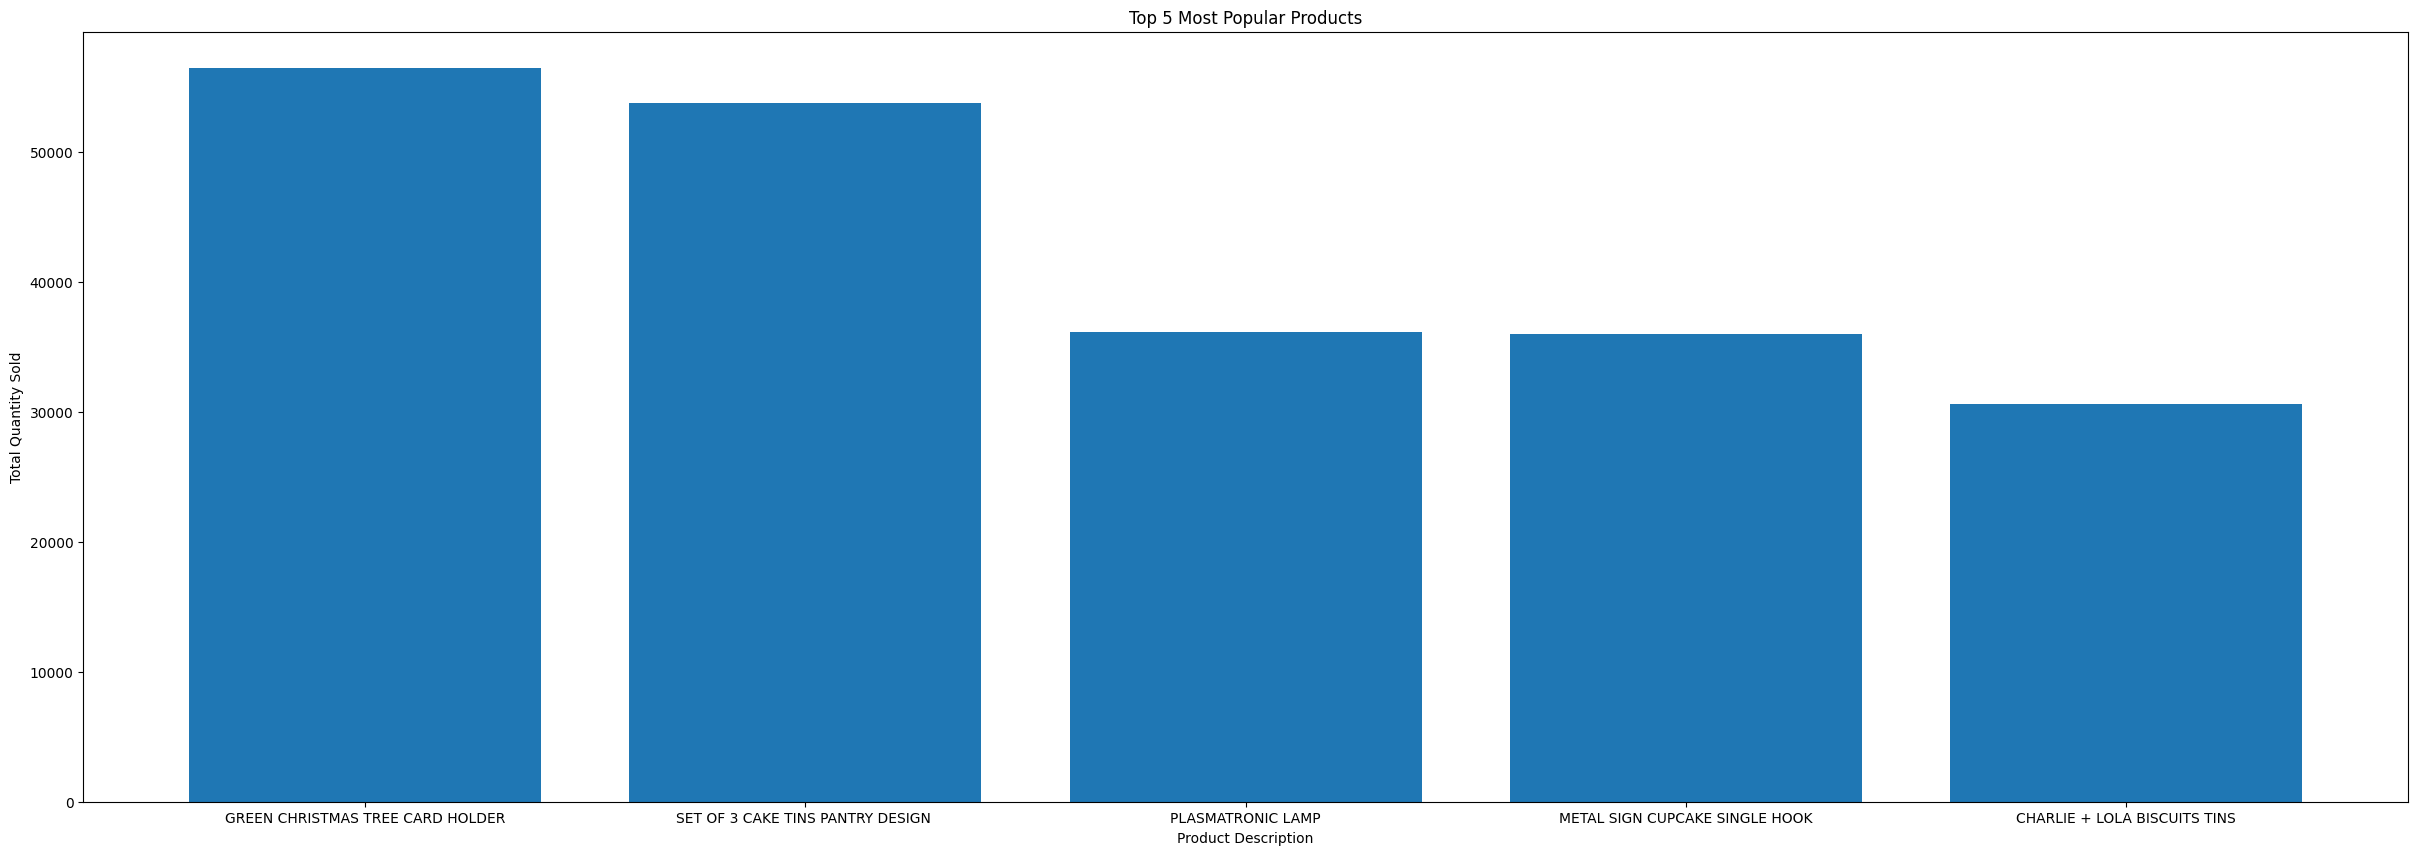

In [27]:
# Calculate product popularity score
df['Popularity'] = df.groupby('StockCode')['Quantity'].sum()
top_5_popular = df.nlargest(5, 'Popularity')
categories = top_5_popular['Description'].head(5).tolist()

# Visualize product popularity with bar chart
plt.figure(figsize=(30, 10))
plt.bar(categories, top_5_popular['Popularity'])
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 5 Most Popular Products')
plt.xticks(rotation=0)
plt.show()

### Monthly Sales Per Year

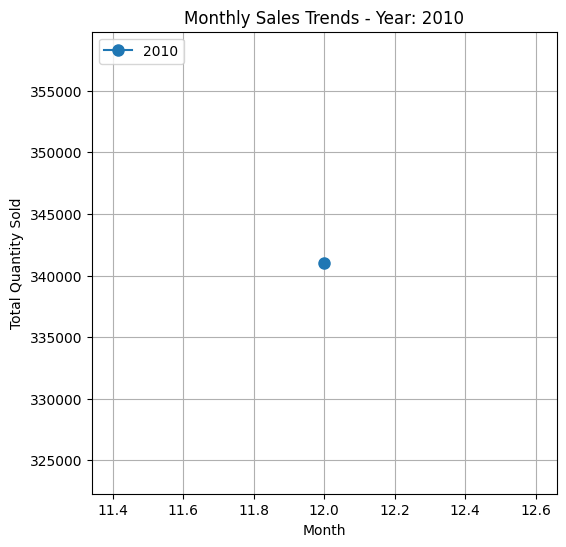

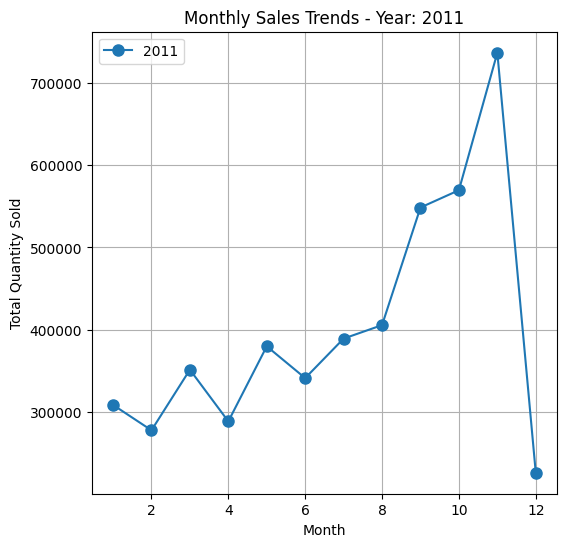

In [29]:
monthly_sales = df.groupby(['Month', 'Year'])['Quantity'].sum().unstack()

# Create separate line charts for each year
for year in monthly_sales.columns:
    year_df = monthly_sales[year]
    plt.figure(figsize=(6, 6))
    year_df.plot(style='-o', markersize=8, label=year)
    plt.xlabel('Month')
    plt.ylabel('Total Quantity Sold')
    plt.title(f'Monthly Sales Trends - Year: {year}')
    plt.legend(loc='upper left')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()

### Heatmap of Sales

<ipython-input-30-01df46de62b5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(df.groupby('Country').sum(), cmap='Reds')


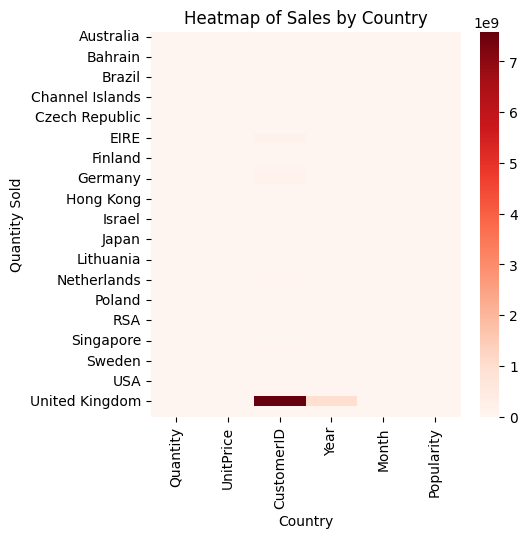

In [30]:
# prompt: draw a heatmap using the country coloumn and it shouldnt involve any text just a figure highlighting all countries

plt.figure(figsize=(5, 5))
sns.heatmap(df.groupby('Country').sum(), cmap='Reds')
plt.title('Heatmap of Sales by Country')
plt.xlabel('Country')
plt.ylabel('Quantity Sold')
plt.show()


### Sales Forecasting Model

In [19]:
# Load data and prepare time series
date_index = pd.to_datetime(df["InvoiceDate"])
df.set_index(date_index, inplace=True)
sales_ts = df["Quantity"]

# Fit ARIMA model
model = ARIMA(sales_ts, order=(1, 1, 1))
model_fit = model.fit()

# Use get_forecast for future dates
forecast = model_fit.get_forecast(steps=30)

start_date = model_fit.fittedvalues.index[-1] + pd.DateOffset(days=1)

# Calculate future dates based on the start_date
future_dates = pd.date_range(start=start_date, periods=30)

# Print forecast results
print(future_dates)
print(forecast.predicted_mean)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


DatetimeIndex(['2011-12-10 12:50:00', '2011-12-11 12:50:00',
               '2011-12-12 12:50:00', '2011-12-13 12:50:00',
               '2011-12-14 12:50:00', '2011-12-15 12:50:00',
               '2011-12-16 12:50:00', '2011-12-17 12:50:00',
               '2011-12-18 12:50:00', '2011-12-19 12:50:00',
               '2011-12-20 12:50:00', '2011-12-21 12:50:00',
               '2011-12-22 12:50:00', '2011-12-23 12:50:00',
               '2011-12-24 12:50:00', '2011-12-25 12:50:00',
               '2011-12-26 12:50:00', '2011-12-27 12:50:00',
               '2011-12-28 12:50:00', '2011-12-29 12:50:00',
               '2011-12-30 12:50:00', '2011-12-31 12:50:00',
               '2012-01-01 12:50:00', '2012-01-02 12:50:00',
               '2012-01-03 12:50:00', '2012-01-04 12:50:00',
               '2012-01-05 12:50:00', '2012-01-06 12:50:00',
               '2012-01-07 12:50:00', '2012-01-08 12:50:00'],
              dtype='datetime64[ns]', freq='D')
536641    10.086602
536642     8.426

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
